In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [4]:
# Create a sample dataset with customer annual income, spending score, and age
data = {'AnnualIncome': [15, 16, 17, 18, 19, 20, 22, 25, 30, 35],
        'SpendingScore': [39, 81, 6, 77, 40, 76, 94, 5, 82, 56],
        'Age': [20, 22, 25, 24, 35, 40, 30, 21, 50, 31]}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

   AnnualIncome  SpendingScore  Age
0            15             39   20
1            16             81   22
2            17              6   25
3            18             77   24
4            19             40   35


In [6]:
from sklearn.preprocessing import StandardScaler

# Normalize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['AnnualIncome', 'SpendingScore', 'Age'])
print(df_scaled.head())

   AnnualIncome  SpendingScore       Age
0     -1.086741      -0.546384 -1.074654
1     -0.924540       0.836033 -0.855337
2     -0.762340      -1.632569 -0.526361
3     -0.600140       0.704374 -0.636020
4     -0.437940      -0.513469  0.570225


In [8]:
from sklearn.cluster import KMeans

# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Display the cluster assignments
print(df_scaled.head())

   AnnualIncome  SpendingScore       Age  KMeans_Cluster
0     -1.086741      -0.546384 -1.074654               2
1     -0.924540       0.836033 -0.855337               0
2     -0.762340      -1.632569 -0.526361               2
3     -0.600140       0.704374 -0.636020               0
4     -0.437940      -0.513469  0.570225               2


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


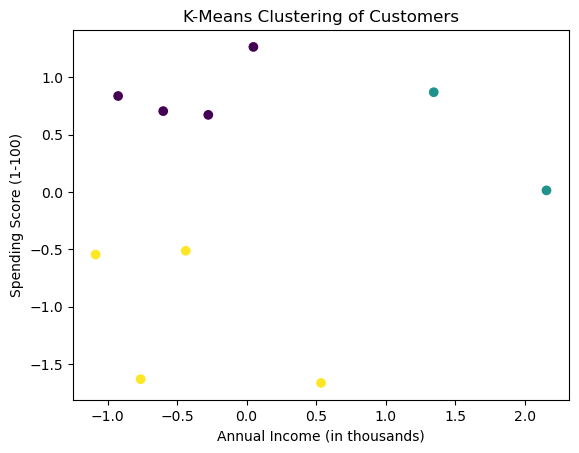

In [10]:
# Visualize the K-Means clusters
plt.scatter(df_scaled['AnnualIncome'], df_scaled['SpendingScore'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [12]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert the PCA result back to a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
print(df_pca.head())

       PCA1      PCA2
0 -1.727176 -0.576167
1  0.282610 -1.762704
2 -2.032233  0.275256
3  0.414749 -1.395518
4 -0.658721  0.581370


In [14]:
from sklearn.manifold import TSNE

# Set perplexity to a value smaller than the number of samples
tsne = TSNE(n_components=2, perplexity=5, random_state=42)

df_tsne = tsne.fit_transform(df_scaled)

# Convert the t-SNE result back to a DataFrame
df_tsne = pd.DataFrame(df_tsne, columns=['t-SNE1', 't-SNE2'])
print(df_tsne.head())

      t-SNE1     t-SNE2
0  11.714720 -62.215267
1  64.004883  29.606417
2 -32.056610 -45.654636
3  93.670731  62.393745
4 -34.399673 -94.397316


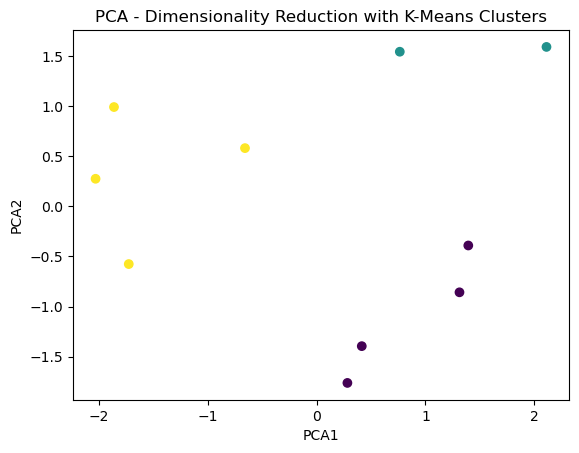

In [16]:
# Visualize the PCA components
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('PCA - Dimensionality Reduction with K-Means Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

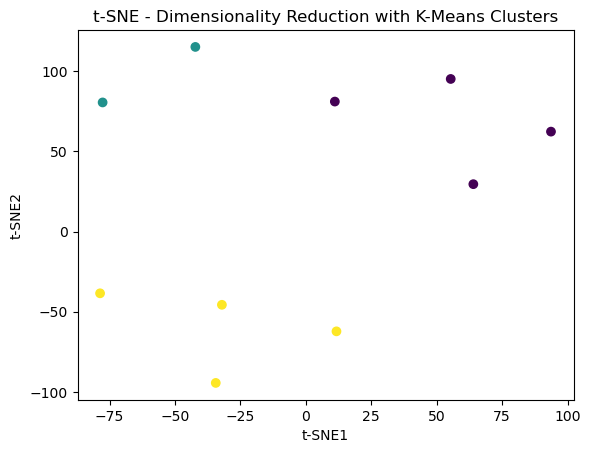

In [18]:
# Visualize the t-SNE components
plt.scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('t-SNE - Dimensionality Reduction with K-Means Clusters')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

Interpreting the results
After performing the clustering and dimensionality reduction, you interpreted the results based on the visualizations and the cluster assignments. Here are some key points to consider:

K-means clustering:

How well did k-means group similar customers? Did the clusters make sense based on the features?

Were the clusters distinct or overlapping? If there was significant overlap, increasing or decreasing k—the number of clusters—could improve the result.

Dimensionality reduction:

PCA: How much variance was captured by the two principal components? If a large percentage of variance was retained—e.g., more than 80 percent—PCA provided a good summary of the dataset.

t-SNE: Did t-SNE reveal any hidden patterns or clusters that were not obvious in the original dataset? t-SNE is often better at visualizing clusters when the dataset has nonlinear relationships.

Conclusion:

PCA simplifies the dataset while retaining global variance, making it useful for visualizing data with linear relationships.

t-SNE excels at preserving local structures and is particularly effective for visualizing nonlinear clusters.

Both techniques worked well together with k-means to group the customers and reveal meaningful patterns in the dataset.